### #1.1 Libraries 📚⬇

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 79.2 MB/s eta 0:00:00


In [3]:
import os, math
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

### #1.2  Read CSV Data 📝

In [4]:
df = pd.read_csv("/content/tsunami_dataset.csv")
df

ID  YEAR  MONTH   DAY  HOUR  MINUTE  LATITUDE  LONGITUDE  \
0       12  -330    NaN   NaN   NaN     NaN    40.000     25.000   
1      481  1764    2.0  11.0   NaN     NaN    51.450     -2.583   
2       71   859    NaN   NaN   NaN     NaN    36.080     36.250   
3      186  1580    1.0   NaN   NaN     NaN    40.000    128.000   
4        5 -1300    NaN   NaN   NaN     NaN    39.960     26.240   
...    ...   ...    ...   ...   ...     ...       ...        ...   
2254  5753  2020    7.0  22.0   6.0    12.0    55.030   -158.522   
2255  5750  2020    6.0  18.0  12.0    49.0   -33.294   -177.838   
2256  5752  2013    4.0  22.0   1.0    16.0    18.081   -102.182   
2257  5749  1867    6.0  10.0   NaN     NaN    -7.800    110.400   
2258  5751  2020    6.0  23.0  15.0    29.0    16.029    -95.901   

                            LOCATION_NAME      COUNTRY  ...       CAUSE  \
0     E. SPORADES ISLANDS, AEGEAN ISLANDS       GREECE  ...  Earthquake   
1                        BRISTOL, ENGLAND           UK  ...     Unknown   
2                               SAMANDAGI       TURKEY  ...  Earthquake   
3                              YELLOW SEA  NORTH KOREA  ...     Unknown   
4                    IONIAN COASTS, TROAD       TURKEY  ...     Unknown   
...                                   ...          ...  ...         ...   
2254                 SHUMAGIN ISLANDS, AK          USA  ...  Earthquake   
2255  S OF RAOUL ISLAND, KERMADEC ISLANDS  NEW ZEALAND  ...  Earthquake   
2256                               MEXICO       MEXICO  ...  Earthquake   
2257                                 JAVA    INDONESIA  ...  Earthquake   
2258               OFF OF COAST OF OAXACA       MEXICO  ...  Earthquake   

             EVENT_VALIDITY EQ_MAGNITUDE  EQ_DEPTH  TS_INTENSITY  \
0     Very Doubtful Tsunami          7.0       NaN           NaN   
1     Very Doubtful Tsunami          NaN       NaN           NaN   
2      Questionable Tsunami          NaN       NaN           3.0   
3     Very Doubtful Tsunami          NaN       NaN           1.0   
4      Questionable Tsunami          6.0       NaN           5.0   
...                     ...          ...       ...           ...   
2254       Definite Tsunami          7.8      28.0           NaN   
2255       Definite Tsunami          7.4      10.0           NaN   
2256       Probable Tsunami          6.0      30.0           NaN   
2257  Very Doubtful Tsunami          NaN       NaN           NaN   
2258       Definite Tsunami          7.4      26.0           NaN   

            DAMAGE_TOTAL_DESCRIPTION    HOUSES_TOTAL_DESCRIPTION  \
0                                NaN                         NaN   
1                                NaN                         NaN   
2                                NaN                         NaN   
3                                NaN                         NaN   
4                                NaN                         NaN   
...                              ...                         ...   
2254                             NaN                         NaN   
2255                             NaN                         NaN   
2256                             NaN                         NaN   
2257    Severe (~>$5 to $24 million)  Many (~101 to 1000 houses)   
2258  Extreme (~$25 million or more)                         NaN   

     DEATHS_TOTAL_DESCRIPTION  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
2254                      NaN   
2255                      NaN   
2256                      NaN   
2257    Few (~1 to 50 people)   
2258    Few (~1 to 50 people)   

                                                    URL  \
0     https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
1     https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
2     https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
3     https://www.ngdc.

### #1.3 Data Pre-processing ⚙️

In [5]:
# deletando as linhas com valores ausentes
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Filtro dataframe do século XIX em diante
df = df[df.YEAR>=1800]

# Obtendo valores positivos de intensidade do tsunami para variar os tamanhos dos círculos 
df['TS_INTENSITY'].fillna(df['TS_INTENSITY'].median(), inplace=True)
df['TS_INTENSITY_PLOT'] = df['TS_INTENSITY'] - df['TS_INTENSITY'].min() + 0.5
df

ID  YEAR  MONTH   DAY  HOUR  MINUTE  LATITUDE  LONGITUDE  \
261    912  1861    6.0   5.0   NaN     NaN    -6.300    107.300   
262    858  1856    3.0   NaN   NaN     NaN   -44.000    172.000   
263    963  1867    8.0   5.0   NaN     NaN   -33.800    151.300   
264    738  1844    3.0  22.0  10.0    13.0    43.400     16.700   
265    816  1854    1.0  15.0   NaN     NaN    20.900    134.800   
...    ...   ...    ...   ...   ...     ...       ...        ...   
2254  5753  2020    7.0  22.0   6.0    12.0    55.030   -158.522   
2255  5750  2020    6.0  18.0  12.0    49.0   -33.294   -177.838   
2256  5752  2013    4.0  22.0   1.0    16.0    18.081   -102.182   
2257  5749  1867    6.0  10.0   NaN     NaN    -7.800    110.400   
2258  5751  2020    6.0  23.0  15.0    29.0    16.029    -95.901   

                            LOCATION_NAME                  COUNTRY  ...  \
261                                  JAVA                INDONESIA  ...   
262   S CANTERBURY PROVINCE, SOUTH ISLAND              NEW ZEALAND  ...   
263                         SYDNEY HARBOR                AUSTRALIA  ...   
264                             DUBROVNIK                  CROATIA  ...   
265                        PHILIPPINE SEA  NORTHWEST PACIFIC OCEAN  ...   
...                                   ...                      ...  ...   
2254                 SHUMAGIN ISLANDS, AK                      USA  ...   
2255  S OF RAOUL ISLAND, KERMADEC ISLANDS              NEW ZEALAND  ...   
2256                               MEXICO                   MEXICO  ...   
2257                                 JAVA                INDONESIA  ...   
2258               OFF OF COAST OF OAXACA                   MEXICO  ...   

             EVENT_VALIDITY EQ_MAGNITUDE EQ_DEPTH  TS_INTENSITY  \
261    Questionable Tsunami          NaN      NaN           1.0   
262        Probable Tsunami          NaN      NaN           0.5   
263   Very Doubtful Tsunami          NaN      NaN          -1.0   
264    Questionable Tsunami          NaN      NaN           2.0   
265   Very Doubtful Tsunami          NaN      NaN           1.0   
...                     ...          ...      ...           ...   
2254       Definite Tsunami          7.8     28.0           1.0   
2255       Definite Tsunami          7.4     10.0           1.0   
2256       Probable Tsunami          6.0     30.0           1.0   
2257  Very Doubtful Tsunami          NaN      NaN           1.0   
2258       Definite Tsunami          7.4     26.0           1.0   

            DAMAGE_TOTAL_DESCRIPTION    HOUSES_TOTAL_DESCRIPTION  \
261            Limited (<$1 million)                         NaN   
262                              NaN                         NaN   
263                              NaN                         NaN   
264                              NaN                         NaN   
265                              NaN                         NaN   
...                              ...                         ...   
2254                             NaN                         NaN   
2255                             NaN                         NaN   
2256                             NaN                         NaN   
2257    Severe (~>$5 to $24 million)  Many (~101 to 1000 houses)   
2258  Extreme (~$25 million or more)                         NaN   

     DEATHS_TOTAL_DESCRIPTION  \
261                       NaN   
262                       NaN   
263                       NaN   
264                       NaN   
265                       NaN   
...                       ...   
2254                      NaN   
2255                      NaN   
2256                      NaN   
2257    Few (~1 to 50 people)   
2258    Few (~1 to 50 people)   

                                                    URL  \
261   https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
262   https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
263   https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
264   https://www.ngdc.noaa.gov/haz

## 2. Visualização 📉

### #2.1 Pontos de plotagem

### Plotando usando `folium.Marker`

In [6]:
map_ = folium.Map(location=[0.78, 113.92], tiles='openstreetmap', zoom_start=4.8)

for idx, row in df.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']], icon=folium.Icon(color='blue', icon='tint', prefix='fa')).add_to(map_)

map_

### Plotando usando `folium.plugins.MarkerCluster` para ajudar a organizar o mapa

In [7]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.6)

mc = MarkerCluster()
for idx, row in df.iterrows():
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

map_.add_child(mc)
map_

### Mapa de bolhas

In [8]:
map_ = folium.Map(location=[0.78, 113.92], tiles='openstreetmap', zoom_start=4.8)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=20000,
        color='green').add_to(map_)

map_

### Mapa de bolhas (baixa / alta intensidade de tsunami)

In [10]:
map_ = folium.Map(location=[0, 0], tiles='openstreetmap', zoom_start=2.4)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=df.iloc[i]['TS_INTENSITY_PLOT']*10000,
        color='green', fill=True).add_to(map_)

map_

### Mapa de calor

In [11]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.5)

HeatMap(data=df[['LATITUDE', 'LONGITUDE']], radius=10).add_to(map_)

# Display the map
map_

### País vs. # Tsunamis

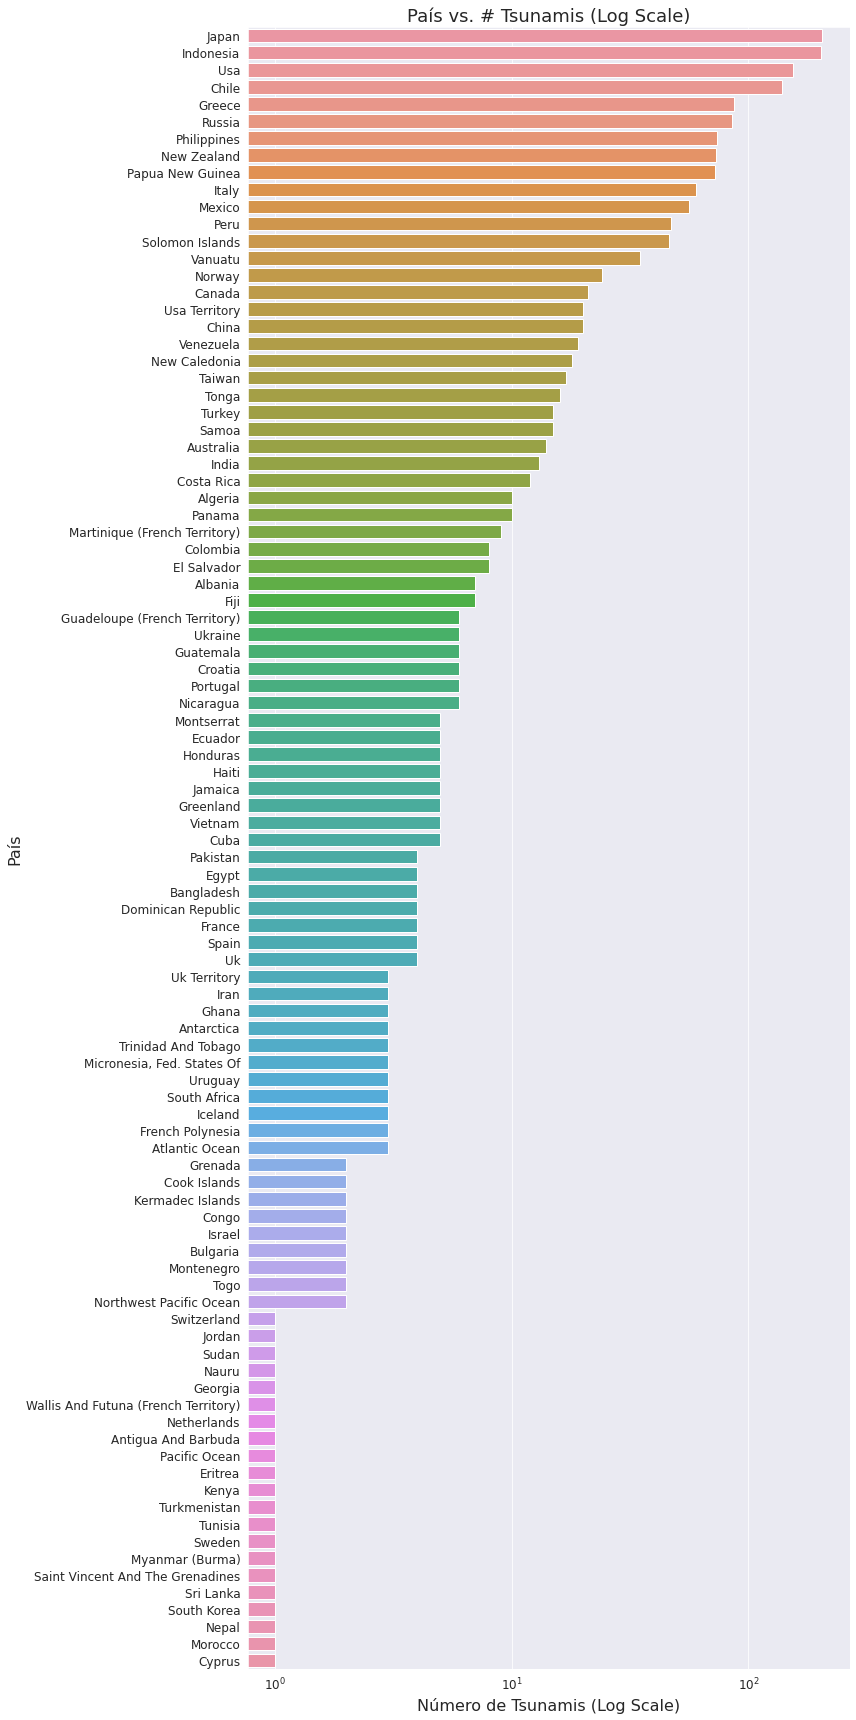

In [19]:
plt.figure(figsize=(12,24))
countries = list(map(lambda x: x.title(), df["COUNTRY"].value_counts().keys().tolist()))
ax = sns.countplot(y="COUNTRY", data=df, order=df["COUNTRY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("País vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Número de Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("País",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### Causa vs. # Tsunamis

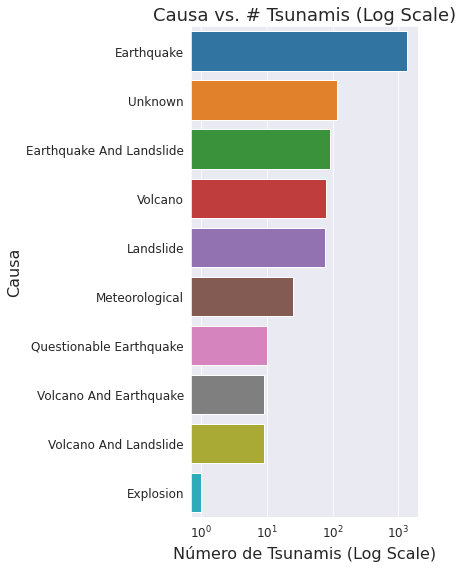

In [20]:
plt.figure(figsize=(6,8))
cause = list(map(lambda x: x.title(), df["CAUSE"].value_counts().keys().tolist()))
ax = sns.countplot(y="CAUSE", data=df, order=df["CAUSE"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Causa vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Número de Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Causa",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(cause, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### Mês vs. # Tsunamis

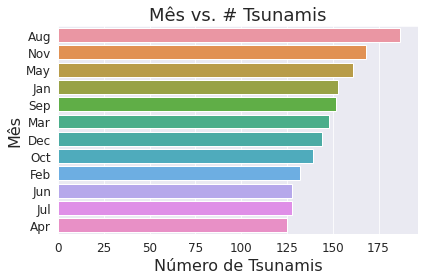

In [21]:
plt.figure(figsize=(6,4))
month_idxs = np.array(list(map(lambda x: int(x), df["MONTH"].value_counts().keys().tolist())))-1
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = list(map(month_names.__getitem__, month_idxs))
ax = sns.countplot(y="MONTH", data=df, order=df["MONTH"].value_counts().index)
ax.axes.set_title("Mês vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Número de Tsunamis",fontsize=16)
ax.set_ylabel("Mês",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(months, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### Magnitude do terremoto vs. # Tsunamis

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


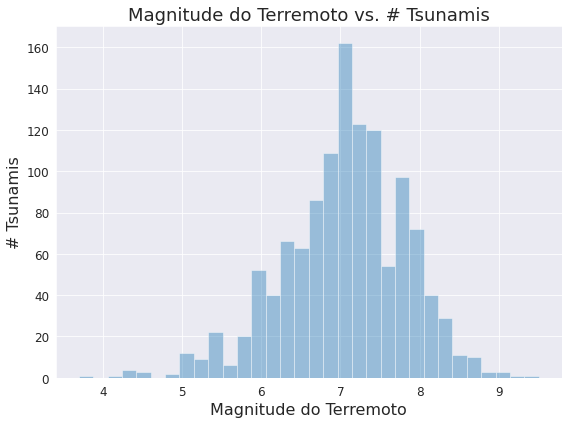

In [22]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df["EQ_MAGNITUDE"], kde=False)
ax.axes.set_title("Magnitude do Terremoto vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Magnitude do Terremoto",fontsize=16)
ax.set_ylabel("# Tsunamis",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

### Intensidade do Tsunami vs. # Tsunamis

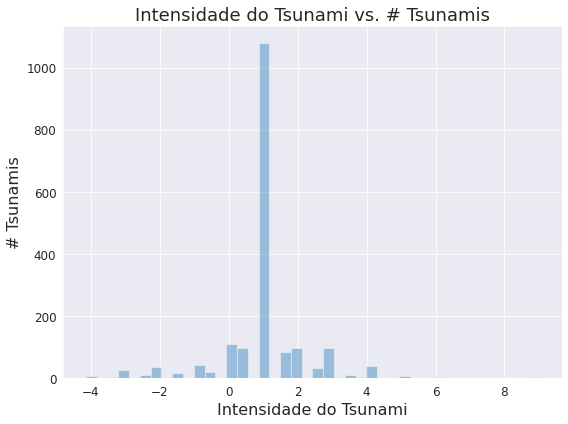

In [23]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df["TS_INTENSITY"], kde=False)
ax.axes.set_title("Intensidade do Tsunami vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Intensidade do Tsunami",fontsize=16)
ax.set_ylabel("# Tsunamis",fontsize=16)
ax.tick_params(labelsize=12)
# ax.set_yticklabels(cause, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### Profundidade do terremoto vs. # Tsunamis

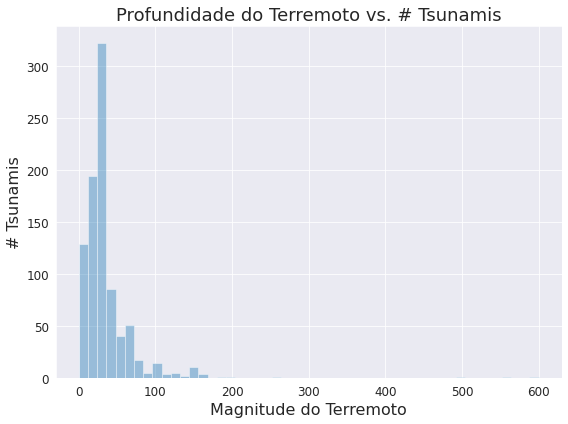

In [24]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df["EQ_DEPTH"], kde=False)
ax.axes.set_title("Profundidade do Terremoto vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Magnitude do Terremoto",fontsize=16)
ax.set_ylabel("# Tsunamis",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

### Validade do Evento vs. # Tsunamis

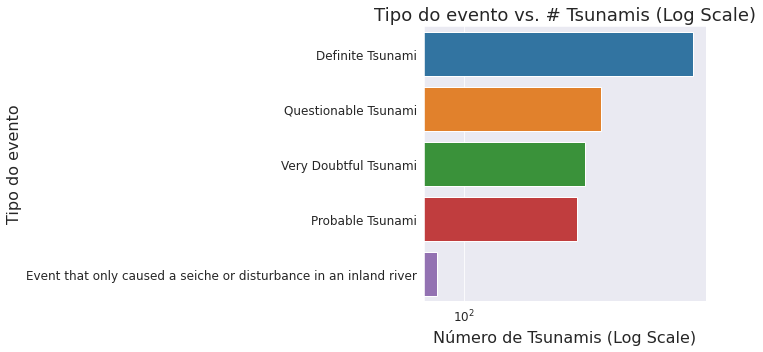

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="EVENT_VALIDITY", data=df, order=df["EVENT_VALIDITY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Tipo do evento vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Número de Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Tipo do evento",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

### Total Damage vs. # Tsunamis

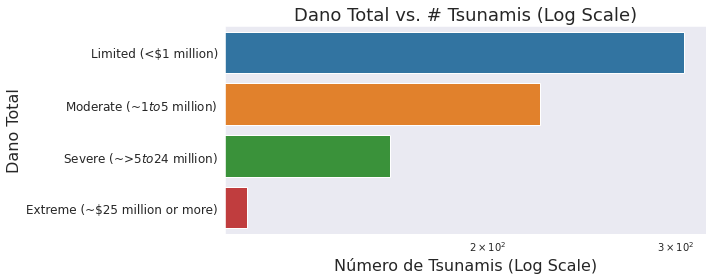

In [26]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="DAMAGE_TOTAL_DESCRIPTION", data=df, order=df["DAMAGE_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Dano Total vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Número de Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Dano Total",fontsize=16)
ax.tick_params(labelsize=12)
# ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### House Damage vs. # Tsunamis

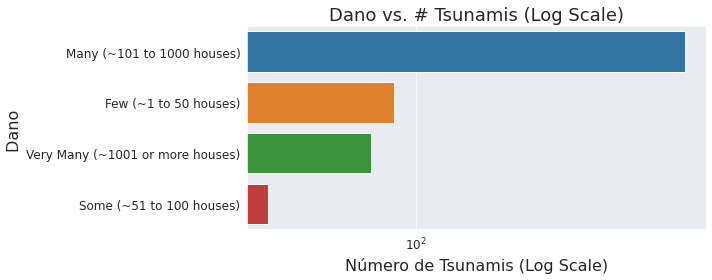

In [28]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="HOUSES_TOTAL_DESCRIPTION", data=df, order=df["HOUSES_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Dano vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Número de Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Dano ",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

### Deaths vs. # Tsunamis

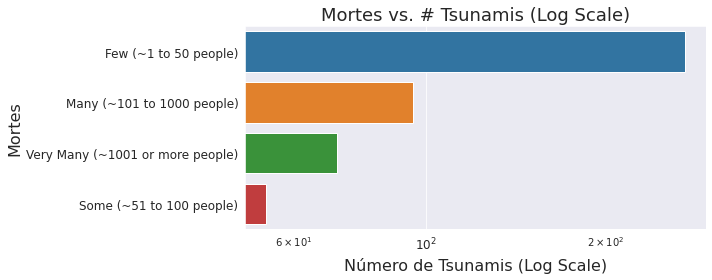

In [29]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="DEATHS_TOTAL_DESCRIPTION", data=df, order=df["DEATHS_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Mortes vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Número de Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Mortes",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()